In [1]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv (r'./data/Nilai_Raport_Kimia.csv')
df

,No,NISN,Nama,L/ P,Harian,PAS/ PAT,Rapor,Predikat,Deskripsi
0,1,68757450,AFIFAH ULYA QURRATA AINI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
1,2,64551214,AGHISTA ZARA SYAVITRI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
2,3,71747289,ANISA SARWAN,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
3,4,78066468,AYU FADILAH,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
4,5,75951831,CEIS AGISTINA,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
...,...,...,...,...,...,...,...,...,...
128,129,40414684,VISTA SYIFA SALIMAH,P,87,87,87,B,Memiliki kemampuan baik terutama kemampuan dal...
129,130,3068557424,WA MIRA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
130,131,49494903,WA NILA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
131,132,38073220,WA ODE RISTA DEWI,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...


In [3]:
df.columns =['No', 'NISN', 'Nama', 'Jenis_Kelamin', 'Nilai_Harian', 'Nilai_PAS', 'Nilai_Rapor', 'Predikat', 'Deskripsi']
df

,No,NISN,Nama,Jenis_Kelamin,Nilai_Harian,Nilai_PAS,Nilai_Rapor,Predikat,Deskripsi
0,1,68757450,AFIFAH ULYA QURRATA AINI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
1,2,64551214,AGHISTA ZARA SYAVITRI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
2,3,71747289,ANISA SARWAN,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
3,4,78066468,AYU FADILAH,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
4,5,75951831,CEIS AGISTINA,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
...,...,...,...,...,...,...,...,...,...
128,129,40414684,VISTA SYIFA SALIMAH,P,87,87,87,B,Memiliki kemampuan baik terutama kemampuan dal...
129,130,3068557424,WA MIRA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
130,131,49494903,WA NILA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
131,132,38073220,WA ODE RISTA DEWI,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...


In [4]:
df.isna().sum()

No               0
NISN             0
Nama             0
Jenis_Kelamin    0
Nilai_Harian     0
Nilai_PAS        0
Nilai_Rapor      0
Predikat         0
Deskripsi        0
dtype: int64

In [5]:
df.dtypes

No                int64
NISN              int64
Nama             object
Jenis_Kelamin    object
Nilai_Harian      int64
Nilai_PAS         int64
Nilai_Rapor       int64
Predikat         object
Deskripsi        object
dtype: object

In [6]:
tabel = df.loc[:,['NISN','Nama', 'Nilai_PAS', 'Nilai_Rapor']]
tabel

,NISN,Nama,Nilai_PAS,Nilai_Rapor
0,68757450,AFIFAH ULYA QURRATA AINI,80,80
1,64551214,AGHISTA ZARA SYAVITRI,80,80
2,71747289,ANISA SARWAN,78,78
3,78066468,AYU FADILAH,78,78
4,75951831,CEIS AGISTINA,78,78
...,...,...,...,...
128,40414684,VISTA SYIFA SALIMAH,87,87
129,3068557424,WA MIRA,87,88
130,49494903,WA NILA,87,88
131,38073220,WA ODE RISTA DEWI,87,88


In [7]:
x = tabel[['Nilai_PAS', 'Nilai_Rapor']].values
print(x)

[[80 80]
 [80 80]
 [78 78]
 [78 78]
 [78 78]
 [80 80]
 [75 75]
 [80 80]
 [78 78]
 [78 78]
 [78 78]
 [78 79]
 [80 80]
 [70 70]
 [73 73]
 [80 80]
 [72 72]
 [78 78]
 [80 80]
 [75 76]
 [84 84]
 [86 86]
 [74 74]
 [78 78]
 [80 80]
 [73 73]
 [73 73]
 [80 80]
 [80 80]
 [80 80]
 [80 80]
 [76 76]
 [73 73]
 [78 78]
 [80 80]
 [80 80]
 [82 82]
 [80 80]
 [78 78]
 [80 80]
 [80 80]
 [81 82]
 [85 85]
 [78 78]
 [80 80]
 [80 80]
 [80 80]
 [84 84]
 [85 85]
 [87 87]
 [86 86]
 [84 84]
 [88 88]
 [83 83]
 [84 84]
 [84 84]
 [93 93]
 [85 85]
 [94 94]
 [90 90]
 [85 85]
 [84 84]
 [84 84]
 [87 87]
 [84 84]
 [84 84]
 [87 87]
 [87 87]
 [92 92]
 [89 89]
 [83 83]
 [92 92]
 [89 89]
 [85 85]
 [88 88]
 [85 85]
 [88 88]
 [84 84]
 [89 89]
 [86 86]
 [84 85]
 [87 88]
 [86 87]
 [90 90]
 [75 75]
 [83 83]
 [89 89]
 [89 89]
 [ 0 52]
 [88 88]
 [80 80]
 [86 86]
 [86 86]
 [86 86]
 [89 89]
 [86 86]
 [83 83]
 [86 86]
 [89 89]
 [88 88]
 [88 88]
 [88 88]
 [83 83]
 [88 88]
 [75 75]
 [84 84]
 [87 86]
 [88 88]
 [84 83]
 [86 86]
 [88 88]
 

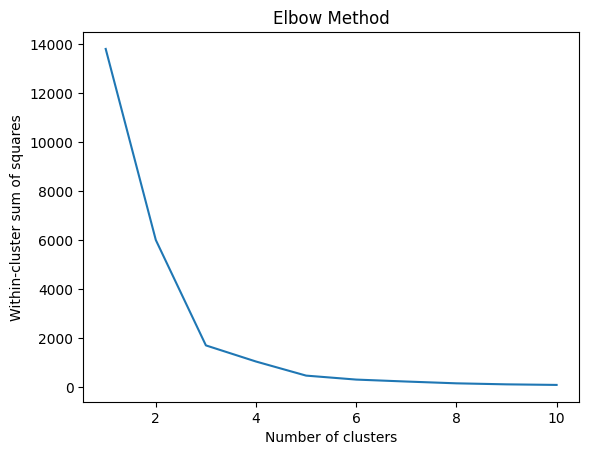

In [8]:
# elbow method (teknik untuk menentukan jumlah klaster yang optimal dalam k-means clustering.)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

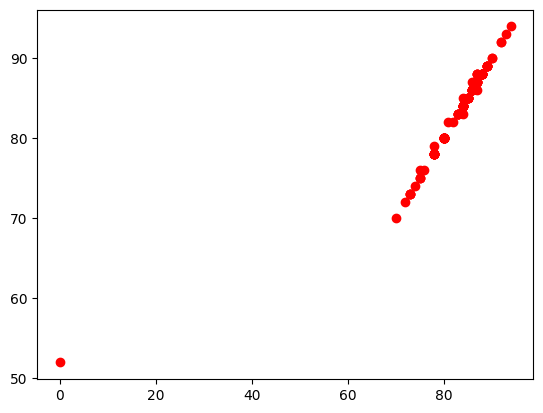

In [9]:
#melihat visualisasi data dari x
plt.plot(x[:,0],x[:,1],'ro')

In [10]:
#inisialisasi nilai cluster 3
kmeans = KMeans(n_clusters=3)

In [11]:
#melakukan clustering dengan data x
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
cluster = kmeans.cluster_centers_

In [13]:
#melihat pusat cluster 1-3
print(cluster)

[[86.42307692 86.47435897]
 [ 0.         52.        ]
 [78.2037037  78.25925926]]


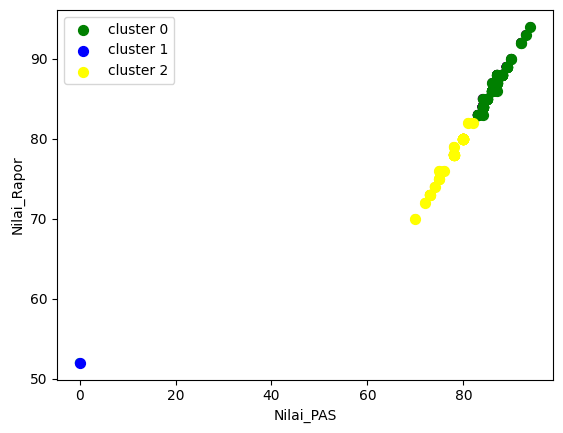

In [14]:
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,marker='o')
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(x[labels ==0,0], x[labels == 0,1], s=50, color='green',label='cluster 0')
plt.scatter(x[labels ==1,0], x[labels == 1,1], s=50, color='blue',label='cluster 1')
plt.scatter(x[labels ==2,0], x[labels == 2,1], s=50, color='yellow',label='cluster 2')
plt.legend()
plt.xlabel('Nilai_PAS')
plt.ylabel('Nilai_Rapor')
plt.show()

In [15]:
y_predicted = kmeans.fit_predict(df[['Nilai_PAS', 'Nilai_Rapor']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0], dtype=int32)

In [16]:
tabel['cluster'] = labels
tabel['cluster'].value_counts()

cluster
0    78
2    54
1     1
Name: count, dtype: int64

In [17]:
tabel['cluster'] = y_predicted
tabel

,NISN,Nama,Nilai_PAS,Nilai_Rapor,cluster
0,68757450,AFIFAH ULYA QURRATA AINI,80,80,0
1,64551214,AGHISTA ZARA SYAVITRI,80,80,0
2,71747289,ANISA SARWAN,78,78,0
3,78066468,AYU FADILAH,78,78,0
4,75951831,CEIS AGISTINA,78,78,0
...,...,...,...,...,...
128,40414684,VISTA SYIFA SALIMAH,87,87,1
129,3068557424,WA MIRA,87,88,1
130,49494903,WA NILA,87,88,1
131,38073220,WA ODE RISTA DEWI,87,88,1


In [18]:
tabel[:60]

,NISN,Nama,Nilai_PAS,Nilai_Rapor,cluster
0,68757450,AFIFAH ULYA QURRATA AINI,80,80,0
1,64551214,AGHISTA ZARA SYAVITRI,80,80,0
2,71747289,ANISA SARWAN,78,78,0
3,78066468,AYU FADILAH,78,78,0
4,75951831,CEIS AGISTINA,78,78,0
5,78010944,CHINTANY AYSKHA FAYRANA SAFRUDDIN,80,80,0
6,67196469,DIAN AL FAIZAH,75,75,0
7,71248270,FAJAR BAKTI SUPRAPTO,80,80,0
8,74302038,L.M RIZKI FEBRIAWAN RAHMAD,78,78,0
9,73869057,L.M. SHAFWAN FEBRIADY,78,78,0


In [19]:
tabel[60:120]

,NISN,Nama,Nilai_PAS,Nilai_Rapor,cluster
60,54726233,RIZKY ABDULLAH ALRASYID,85,85,1
61,45564835,SARFIN DIEN,84,84,1
62,24501805,SARIANTI PARTIWI,84,84,1
63,57037855,SOFIYANTI,87,87,1
64,55199551,SUMARLIN. A,84,84,1
65,68127194,WA ODE FEBRIANTI,84,84,1
66,55027525,WA ODE MEI RAMADANI,87,87,1
67,69365193,ZUHRIA,87,87,1
68,48170010,AHMAD SAKWAN A.,92,92,1
69,50999517,AMANDA,89,89,1


In [20]:
tabel[120:]

,NISN,Nama,Nilai_PAS,Nilai_Rapor,cluster
120,46624290,LA ODE MUH. SYUKRAN SALMAN,84,84,1
121,34082850,MIRNA WATI,88,88,1
122,25104576,NEFRIA,86,86,1
123,42411955,RISKA AMALIA,85,85,1
124,15040333,SARAH,86,86,1
125,41025285,SITI SOFIA HARTIN,84,84,1
126,34974410,SUKMA AYU PURNAMA. R,80,80,0
127,46767233,TETI KURNIAWATI,87,87,1
128,40414684,VISTA SYIFA SALIMAH,87,87,1
129,3068557424,WA MIRA,87,88,1
